# **Students Drugs Addiction Dataset**

Цей датасет призначений для аналізу та вивчення факторів, пов'язаних із вживанням наркотиків серед студентів. Він містить інформацію про 50342 студентів (у навчальній вибірці) та 10 ознак, які описують різні аспекти їхнього життя та поведінки.

Ознаки:

1. **Experimentation:** Чи експериментував студент з наркотиками ("Yes"/"No").
2. **Academic_Performance_Decline:** Чи спостерігається погіршення академічної успішності через вживання наркотиків ("Yes"/"No").
3. **Social_Isolation:** Чи призводить вживання наркотиків до соціальної ізоляції ("Yes"/"No").
4. **Financial_Issues:** Чи має студент фінансові труднощі через вживання наркотиків ("Yes"/"No").
5. **Physical_Mental_Health_Problems:** Чи є у студента фізичні або психічні проблеми зі здоров'ям, пов'язані з вживанням наркотиків ("Yes"/"No").
6. **Legal_Consequences:** Чи були у студента юридичні наслідки, пов'язані з вживанням наркотиків ("Yes"/"No").
7. **Relationship_Strain:** Чи призводить вживання наркотиків до напруження у стосунках з іншими людьми ("Yes"/"No").
8. **Risk_Taking_Behavior:** Чи проявляє студент ризиковану поведінку під впливом наркотиків ("Yes"/"No").
9. **Withdrawal_Symptoms:** Чи є у студента симптоми відміни при спробі припинити вживання наркотиків ("Yes"/"No").
10. **Denial_and_Resistance_to_Treatment:** Чи заперечує студент наявність проблеми або чинить опір лікуванню від наркотичної залежності ("Yes"/"No").
11. **Addiction_Class:** Цільова змінна, яка вказує, чи є у студента залежність від наркотиків ("Yes"/"No").

**Тип даних:**
Усі ознаки у датасеті є категоріальними, представленими у вигляді бінарних значень "Yes" або "No".

Монтування Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Імпорт бібліотек

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import statsmodels.graphics.mosaicplot as mosaic

Завантаження датасету

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/LNU/2 course/2 semester/BDA/Project/Data/student_addiction_dataset_train.csv')

Попередній огляд: Виводимо перші 5 рядків датасету за допомогою df.head().

In [ ]:
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))

| Experimentation   | Academic_Performance_Decline   | Social_Isolation   | Financial_Issues   | Physical_Mental_Health_Problems   | Legal_Consequences   | Relationship_Strain   | Risk_Taking_Behavior   | Withdrawal_Symptoms   | Denial_and_Resistance_to_Treatment   | Addiction_Class   |
|:------------------|:-------------------------------|:-------------------|:-------------------|:----------------------------------|:---------------------|:----------------------|:-----------------------|:----------------------|:-------------------------------------|:------------------|
| Yes               | No                             | No                 | Yes                | No                                | No                   | No                    | Yes                    | No                    | No                                   | No                |
| No                | Yes                            | nan                | Yes                | Yes                               | Yes

Інформація про датасет: Виводимо типи даних та кількість непропущених значень за допомогою df.info().

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50342 entries, 0 to 50341
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Experimentation                     47780 non-null  object
 1   Academic_Performance_Decline        47844 non-null  object
 2   Social_Isolation                    47792 non-null  object
 3   Financial_Issues                    47805 non-null  object
 4   Physical_Mental_Health_Problems     47888 non-null  object
 5   Legal_Consequences                  47766 non-null  object
 6   Relationship_Strain                 47799 non-null  object
 7   Risk_Taking_Behavior                47765 non-null  object
 8   Withdrawal_Symptoms                 47730 non-null  object
 9   Denial_and_Resistance_to_Treatment  47889 non-null  object
 10  Addiction_Class                     50342 non-null  object
dtypes: object(11)
memory usage: 4.2+ MB
None


Перевірка на пропущені значення: Виводимо кількість пропущених значень для кожної ознаки.

In [ ]:
print("Пропущені значення:")
print(df.isnull().sum().to_markdown(numalign="left", stralign="left"))

Пропущені значення:
|                                    | 0    |
|:-----------------------------------|:-----|
| Experimentation                    | 2562 |
| Academic_Performance_Decline       | 2498 |
| Social_Isolation                   | 2550 |
| Financial_Issues                   | 2537 |
| Physical_Mental_Health_Problems    | 2454 |
| Legal_Consequences                 | 2576 |
| Relationship_Strain                | 2543 |
| Risk_Taking_Behavior               | 2577 |
| Withdrawal_Symptoms                | 2612 |
| Denial_and_Resistance_to_Treatment | 2453 |
| Addiction_Class                    | 0    |


Опис числових даних: Виводимо основні статистичні показники (середнє, медіана, стандартне відхилення тощо) для числових ознак.

In [ ]:
print("Опис числових даних:")
print(df.describe().to_markdown(numalign="left", stralign="left"))

Опис числових даних:
|        | Experimentation   | Academic_Performance_Decline   | Social_Isolation   | Financial_Issues   | Physical_Mental_Health_Problems   | Legal_Consequences   | Relationship_Strain   | Risk_Taking_Behavior   | Withdrawal_Symptoms   | Denial_and_Resistance_to_Treatment   | Addiction_Class   |
|:-------|:------------------|:-------------------------------|:-------------------|:-------------------|:----------------------------------|:---------------------|:----------------------|:-----------------------|:----------------------|:-------------------------------------|:------------------|
| count  | 47780             | 47844                          | 47792              | 47805              | 47888                             | 47766                | 47799                 | 47765                  | 47730                 | 47889                                | 50342             |
| unique | 2                 | 2                              | 2                  | 2  

Аналіз розподілу категоріальних ознак: Для кожної категоріальної ознаки виводимо кількість унікальних значень та їх розподіл, а також будуємо стовпчикові діаграми.

Розподіл значень для 'Experimentation':
| Experimentation   | count   |
|:------------------|:--------|
| Yes               | 24017   |
| No                | 23763   |


<ipython-input-8-d89044c300a9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="viridis")


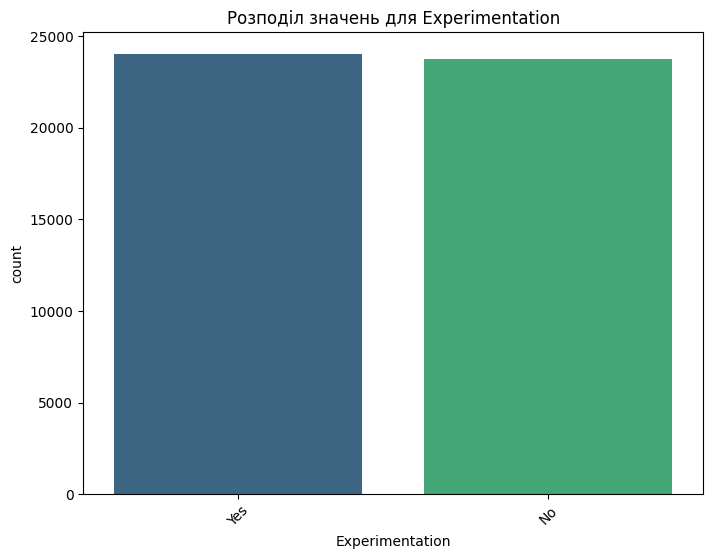

Розподіл значень для 'Academic_Performance_Decline':
| Academic_Performance_Decline   | count   |
|:-------------------------------|:--------|
| Yes                            | 23955   |
| No                             | 23889   |


<ipython-input-8-d89044c300a9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="viridis")


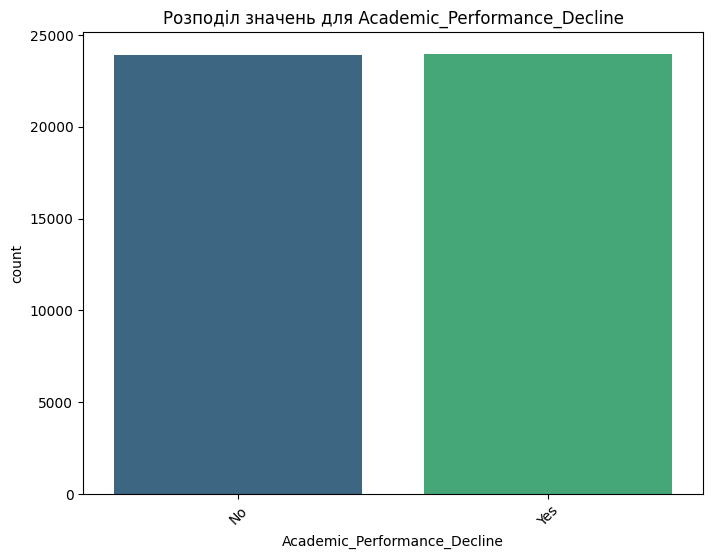

Розподіл значень для 'Social_Isolation':
| Social_Isolation   | count   |
|:-------------------|:--------|
| Yes                | 23898   |
| No                 | 23894   |


<ipython-input-8-d89044c300a9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="viridis")


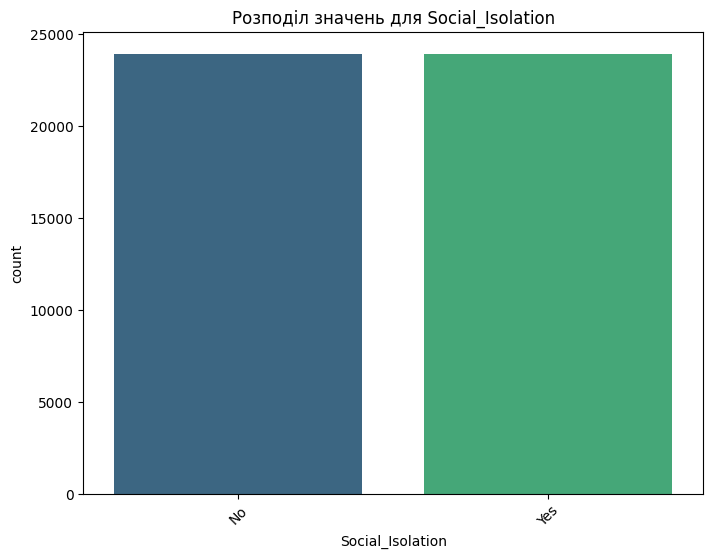

Розподіл значень для 'Financial_Issues':
| Financial_Issues   | count   |
|:-------------------|:--------|
| Yes                | 23993   |
| No                 | 23812   |


<ipython-input-8-d89044c300a9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="viridis")


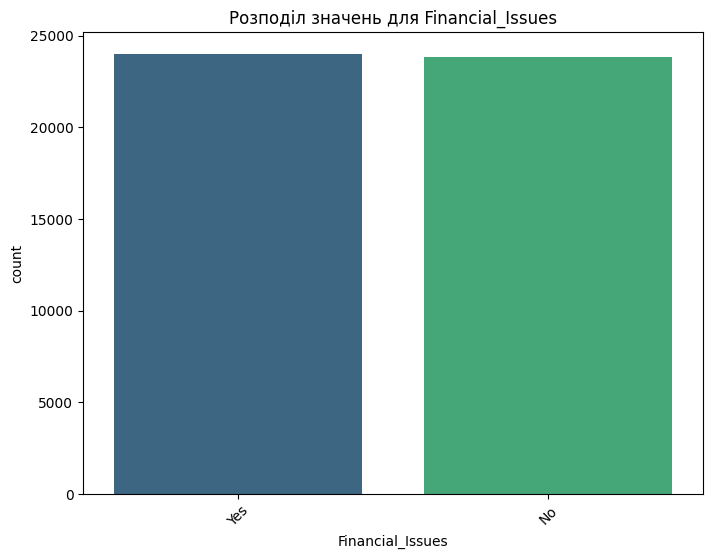

Розподіл значень для 'Physical_Mental_Health_Problems':
| Physical_Mental_Health_Problems   | count   |
|:----------------------------------|:--------|
| No                                | 23986   |
| Yes                               | 23902   |


<ipython-input-8-d89044c300a9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="viridis")


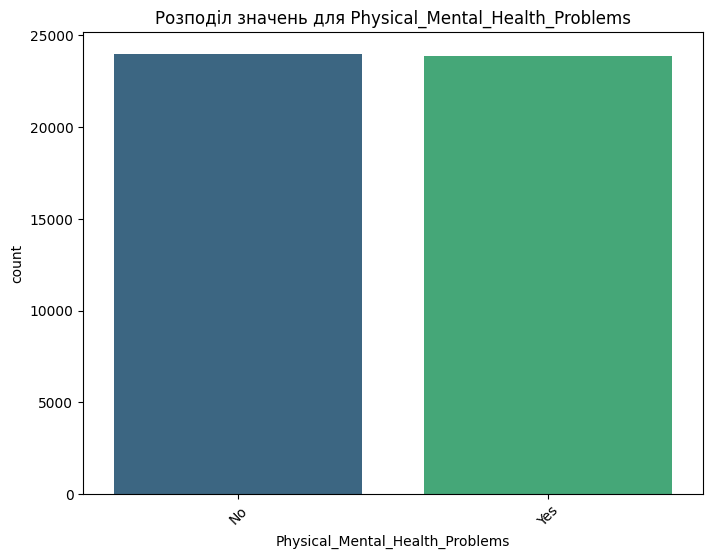

Розподіл значень для 'Legal_Consequences':
| Legal_Consequences   | count   |
|:---------------------|:--------|
| No                   | 23915   |
| Yes                  | 23851   |


<ipython-input-8-d89044c300a9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="viridis")


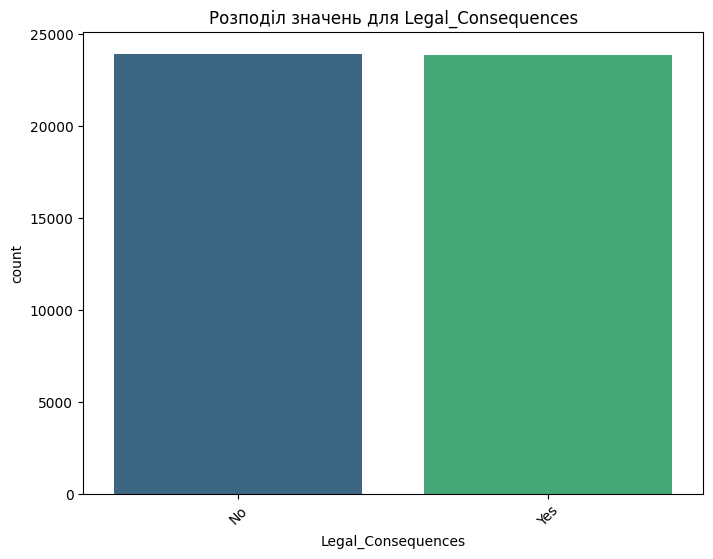

Розподіл значень для 'Relationship_Strain':
| Relationship_Strain   | count   |
|:----------------------|:--------|
| Yes                   | 24010   |
| No                    | 23789   |


<ipython-input-8-d89044c300a9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="viridis")


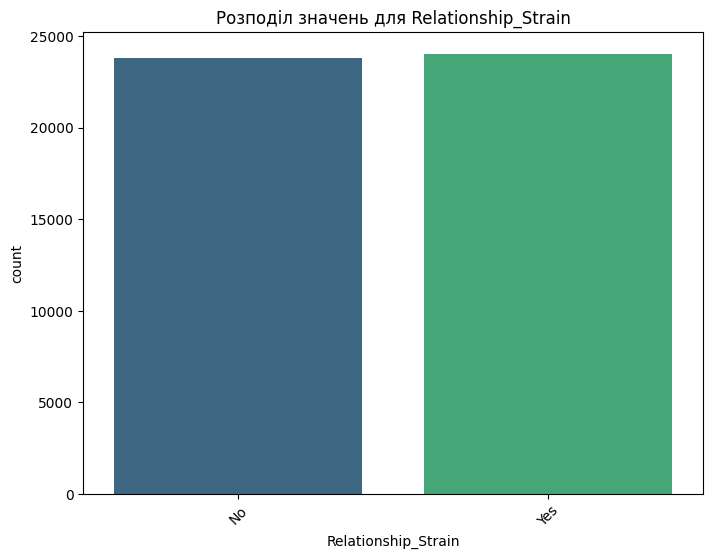

Розподіл значень для 'Risk_Taking_Behavior':
| Risk_Taking_Behavior   | count   |
|:-----------------------|:--------|
| No                     | 23938   |
| Yes                    | 23827   |


<ipython-input-8-d89044c300a9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="viridis")


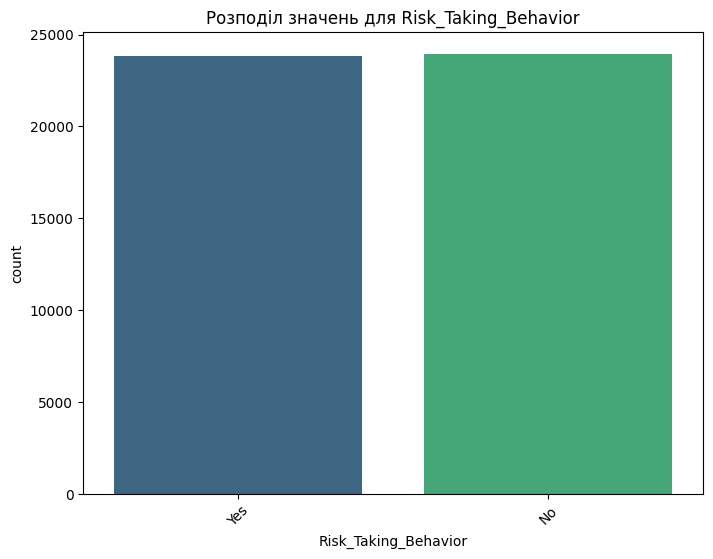

Розподіл значень для 'Withdrawal_Symptoms':
| Withdrawal_Symptoms   | count   |
|:----------------------|:--------|
| Yes                   | 24058   |
| No                    | 23672   |


<ipython-input-8-d89044c300a9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="viridis")


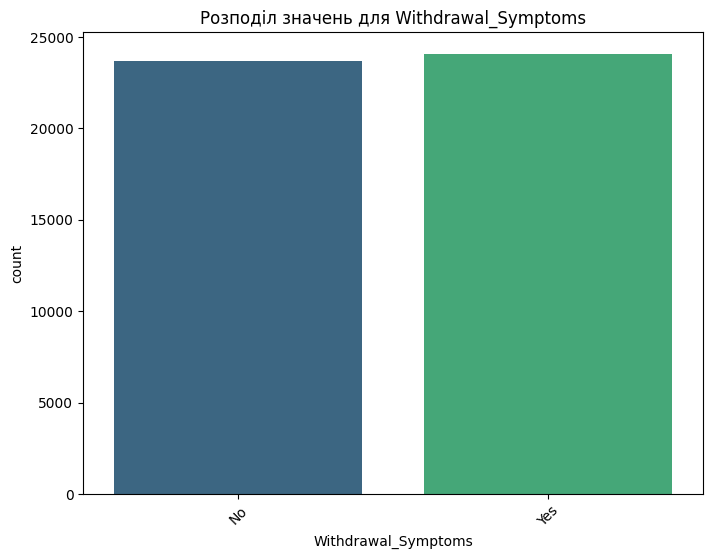

Розподіл значень для 'Denial_and_Resistance_to_Treatment':
| Denial_and_Resistance_to_Treatment   | count   |
|:-------------------------------------|:--------|
| Yes                                  | 24071   |
| No                                   | 23818   |


<ipython-input-8-d89044c300a9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="viridis")


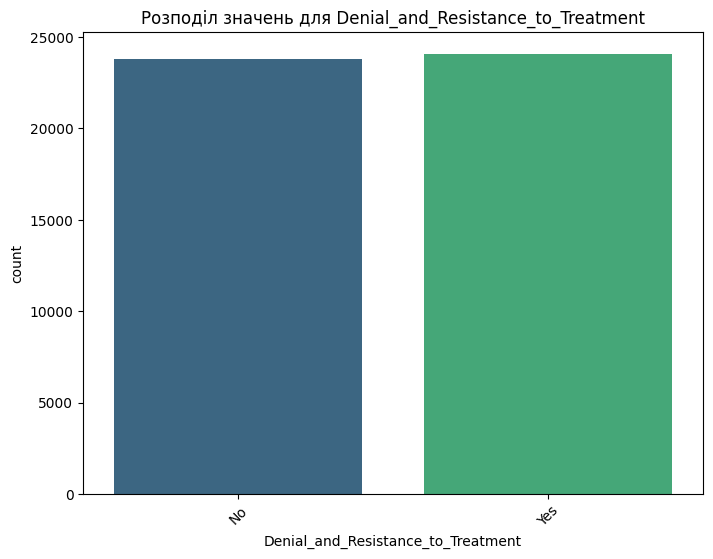

Розподіл значень для 'Addiction_Class':
| Addiction_Class   | count   |
|:------------------|:--------|
| No                | 35270   |
| Yes               | 15072   |


<ipython-input-8-d89044c300a9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="viridis")


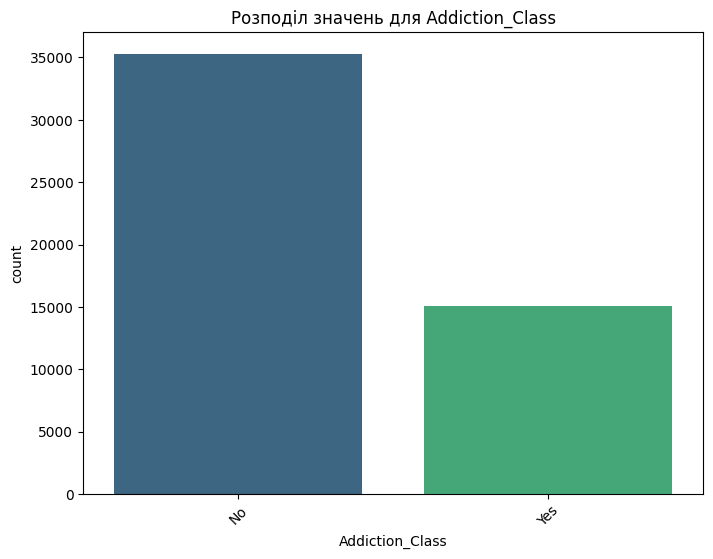

In [ ]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"Розподіл значень для '{col}':")
        print(df[col].value_counts().to_markdown(numalign="left", stralign="left"))
        # Візуалізація розподілу значень для категоріальних ознак
        plt.figure(figsize=(8, 6))
        sns.countplot(x=col, data=df, palette="viridis")
        plt.title(f'Розподіл значень для {col}')
        plt.xticks(rotation=45)
        plt.show()

Тест хі-квадрат: Використовуємо chi2_contingency для визначення, чи є статистично значущий зв'язок між парами категоріальних ознак.

In [ ]:
for i in range(len(df.columns)):
    for j in range(i+1, len(df.columns)):
        col1 = df.columns[i]
        col2 = df.columns[j]
        contingency_table = pd.crosstab(df[col1], df[col2])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        print(f"Тест хі-квадрат для '{col1}' та '{col2}':")
        print(f"  Хі-квадрат: {chi2:.2f}")
        print(f"  p-значення: {p:.4f}")
        print("\n")

Тест хі-квадрат для 'Experimentation' та 'Academic_Performance_Decline':
  Хі-квадрат: 0.10
  p-значення: 0.7505


Тест хі-квадрат для 'Experimentation' та 'Social_Isolation':
  Хі-квадрат: 1.17
  p-значення: 0.2796


Тест хі-квадрат для 'Experimentation' та 'Financial_Issues':
  Хі-квадрат: 0.91
  p-значення: 0.3411


Тест хі-квадрат для 'Experimentation' та 'Physical_Mental_Health_Problems':
  Хі-квадрат: 0.16
  p-значення: 0.6905


Тест хі-квадрат для 'Experimentation' та 'Legal_Consequences':
  Хі-квадрат: 1.70
  p-значення: 0.1918


Тест хі-квадрат для 'Experimentation' та 'Relationship_Strain':
  Хі-квадрат: 0.75
  p-значення: 0.3868


Тест хі-квадрат для 'Experimentation' та 'Risk_Taking_Behavior':
  Хі-квадрат: 0.97
  p-значення: 0.3257


Тест хі-квадрат для 'Experimentation' та 'Withdrawal_Symptoms':
  Хі-квадрат: 0.08
  p-значення: 0.7712


Тест хі-квадрат для 'Experimentation' та 'Denial_and_Resistance_to_Treatment':
  Хі-квадрат: 1.22
  p-значення: 0.2696


Тест хі-квадрат 

Мозаїчна діаграма: Візуалізуємо взаємозв'язки між парами категоріальних ознак за допомогою мозаїчної діаграми, яка відображає розподіл значень та їх пропорції.

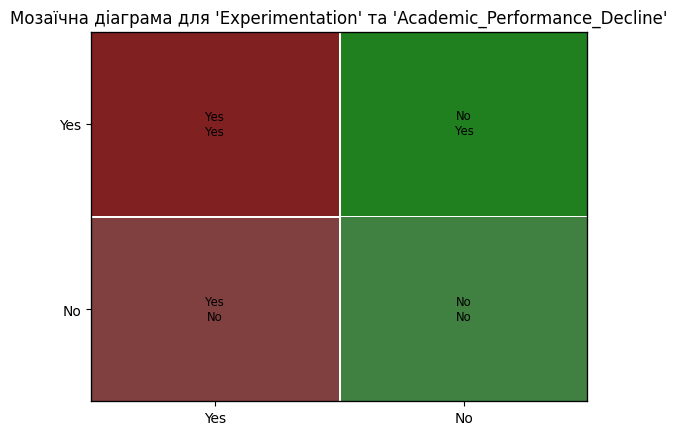

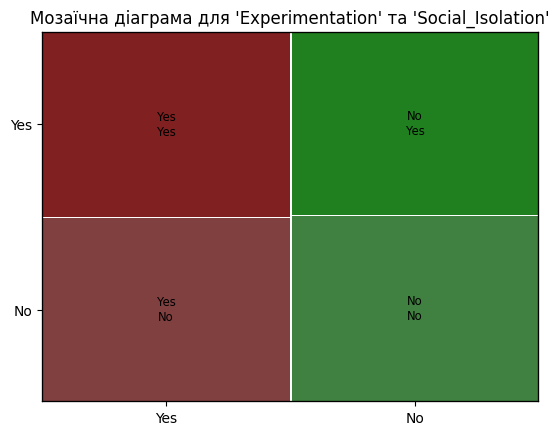

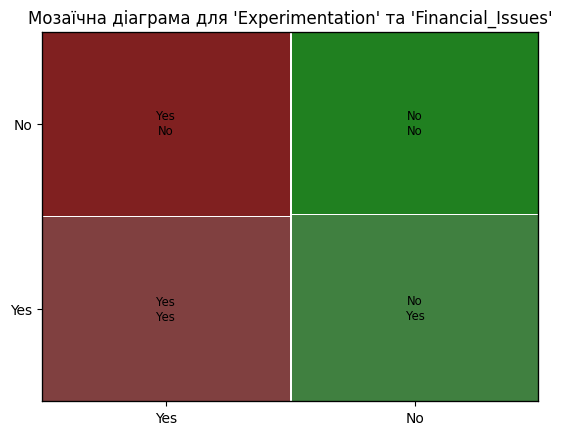

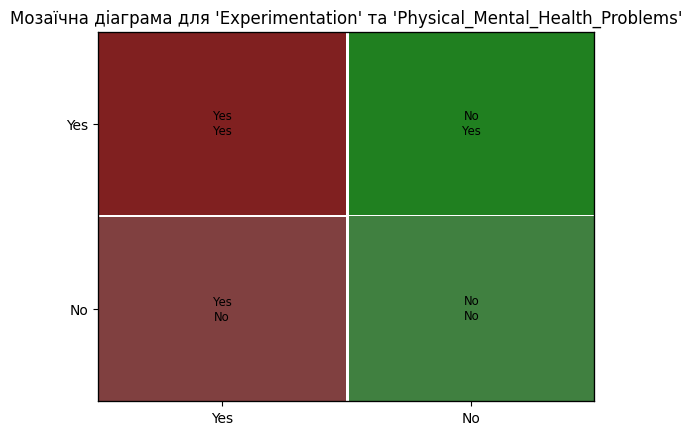

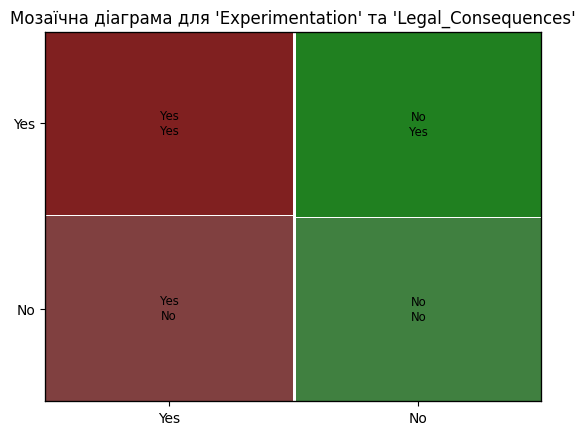

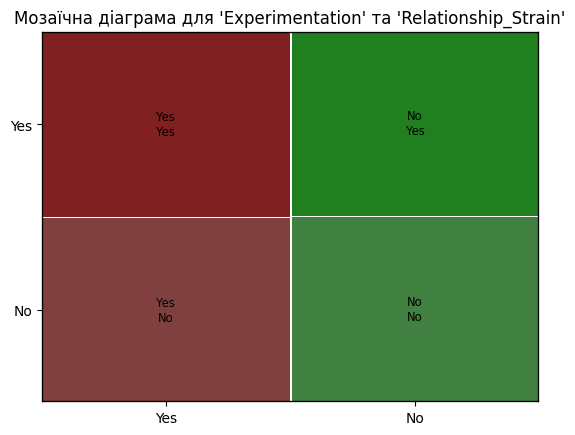

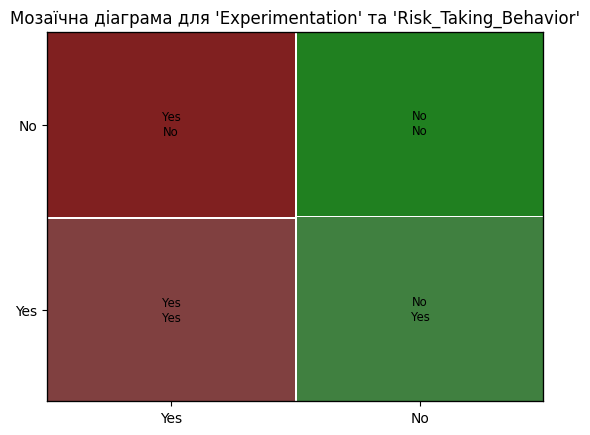

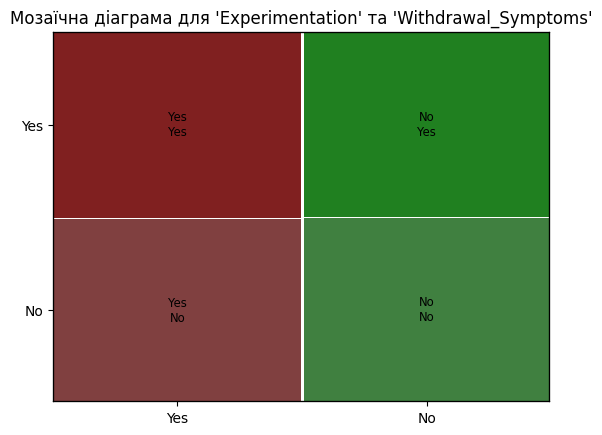

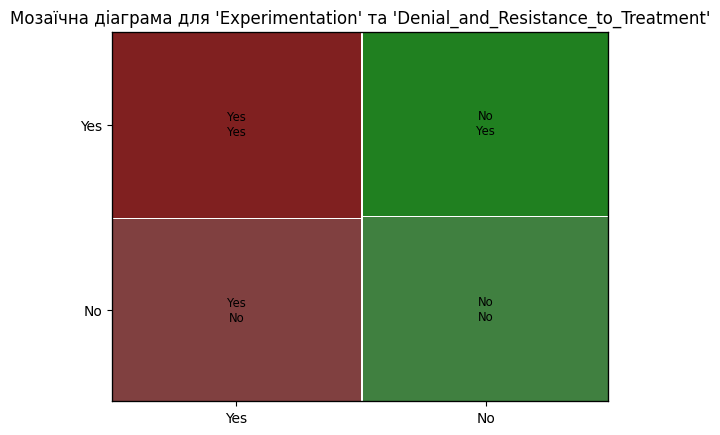

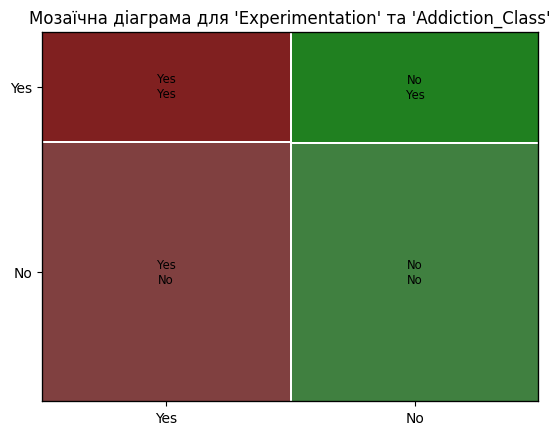

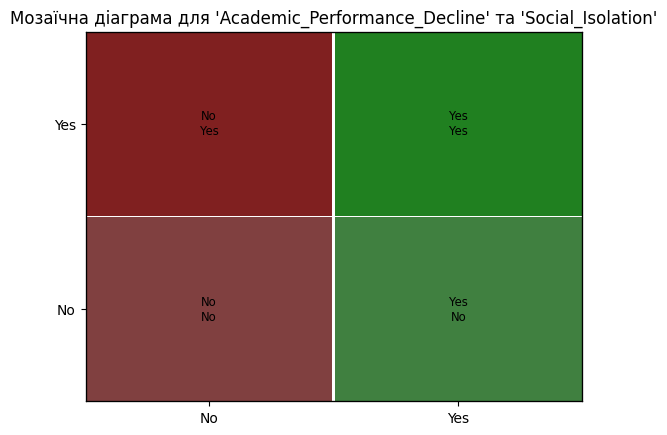

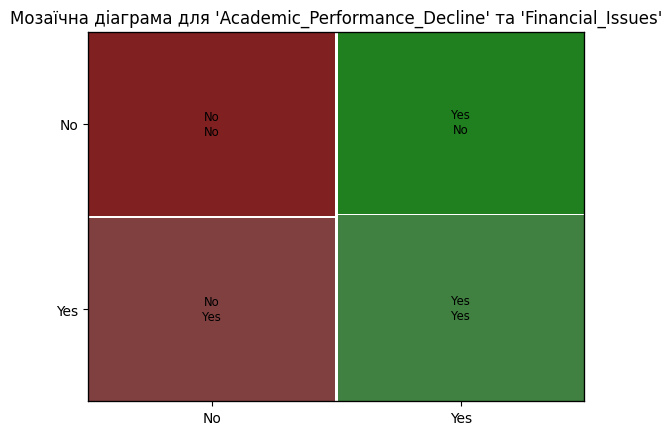

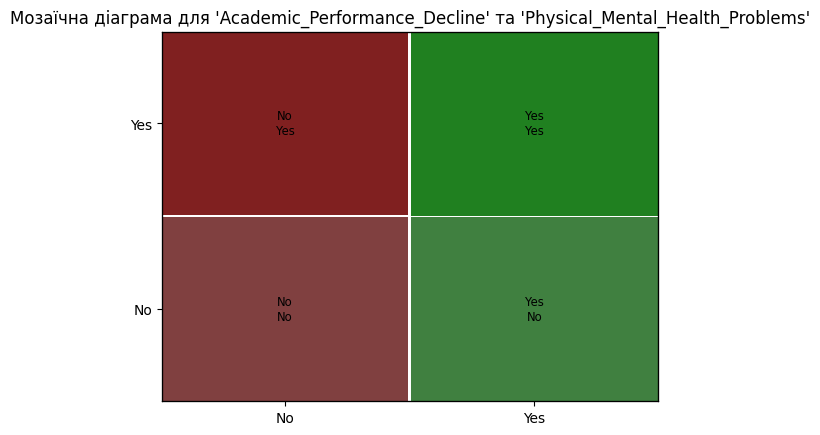

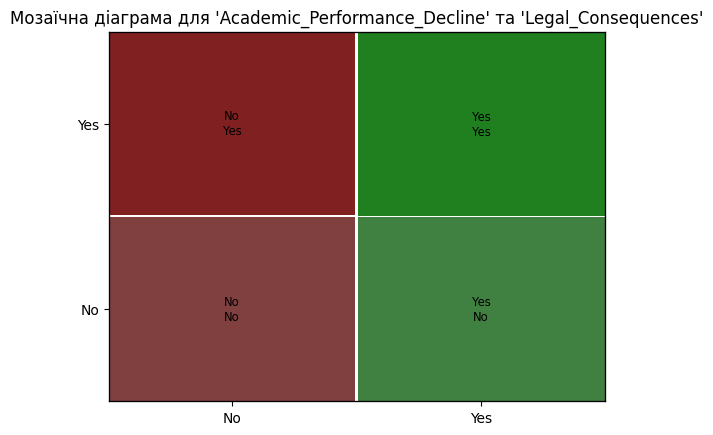

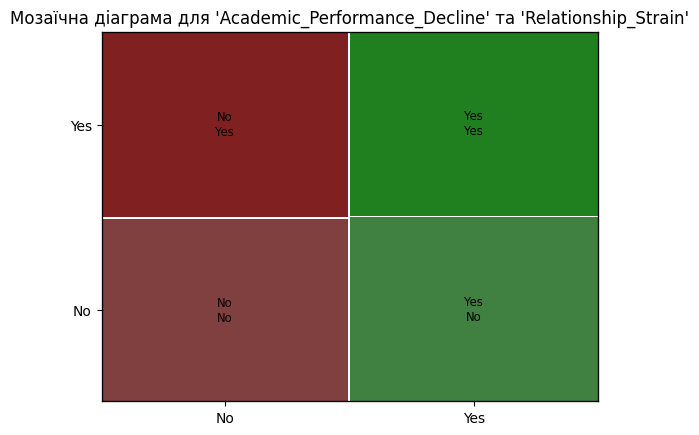

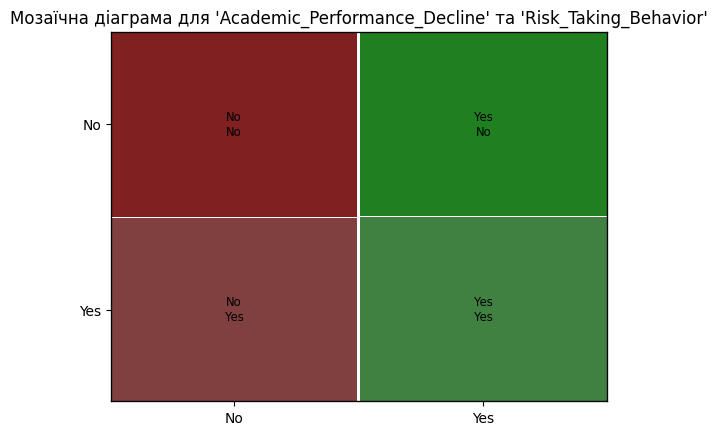

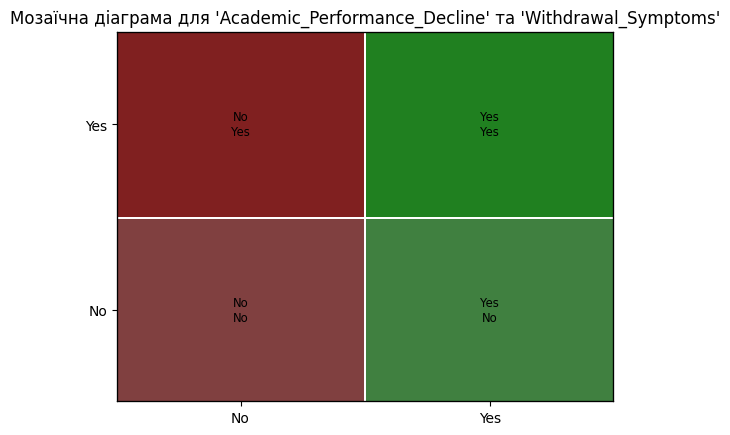

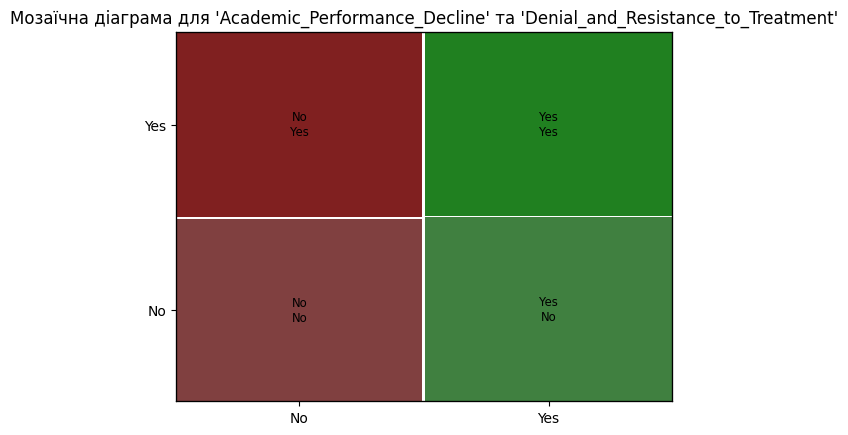

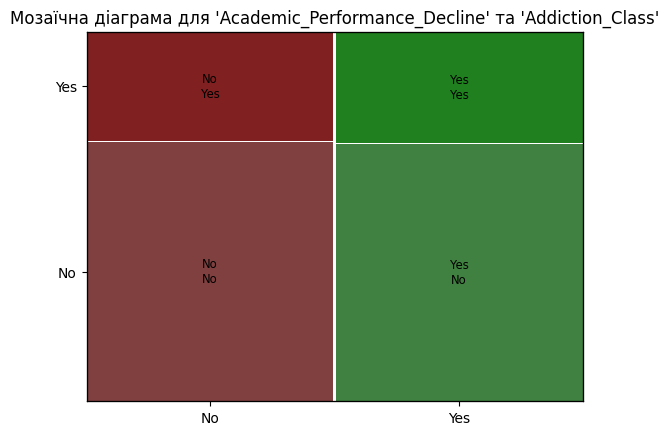

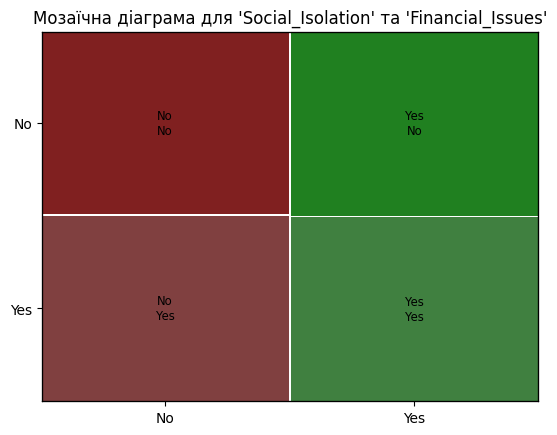

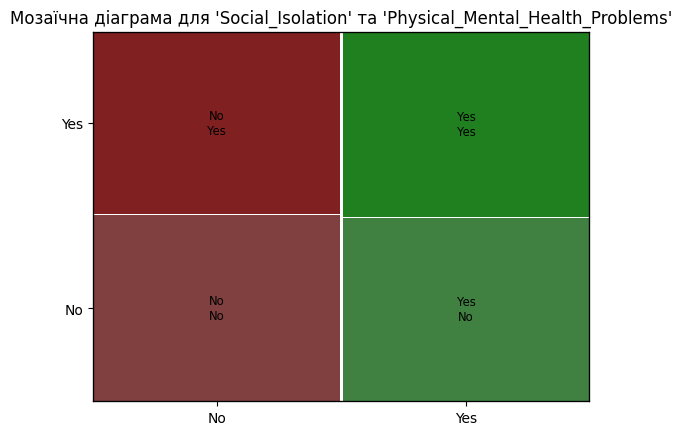

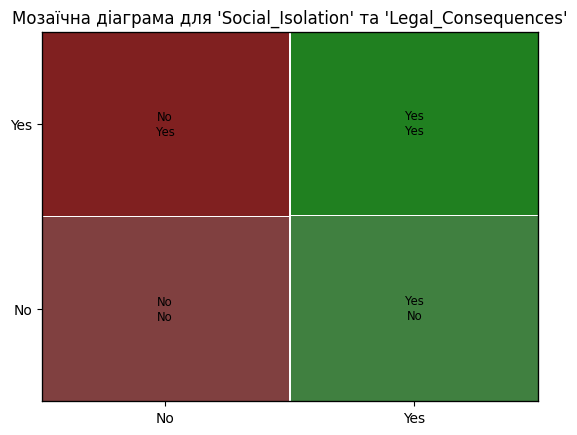

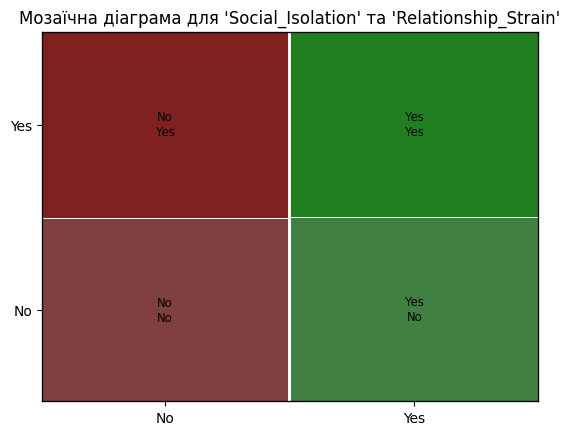

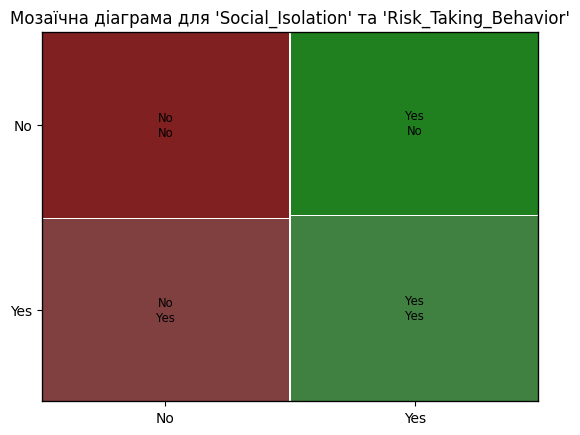

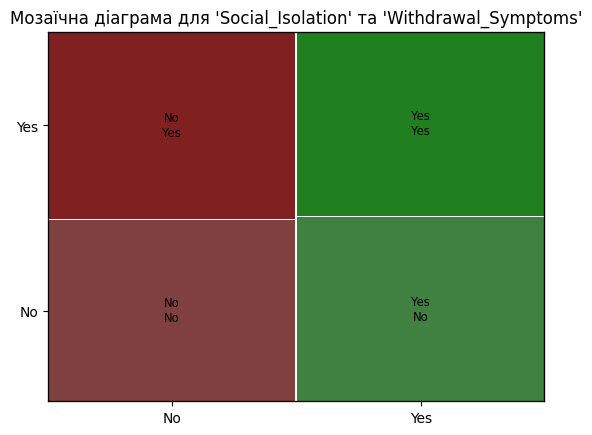

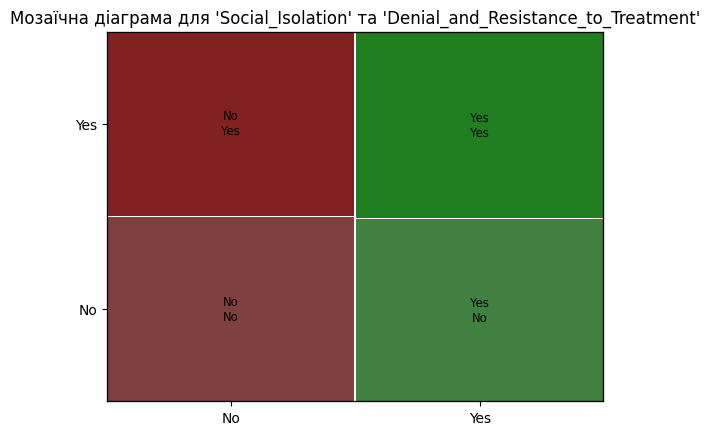

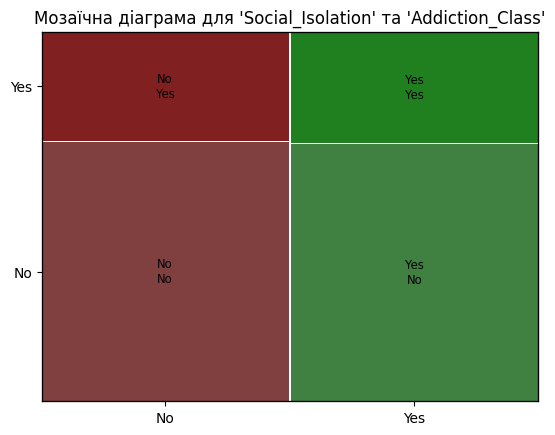

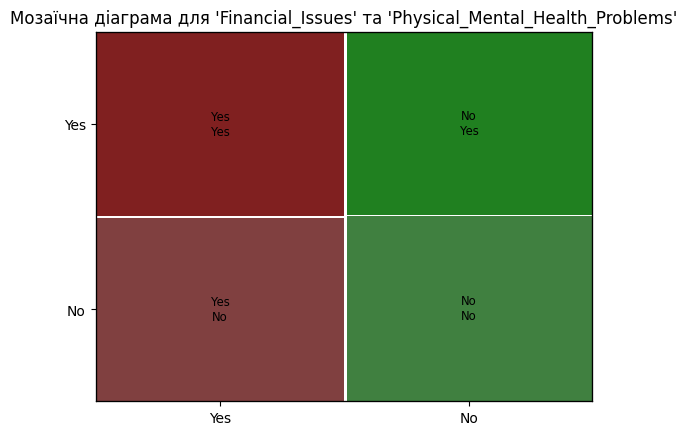

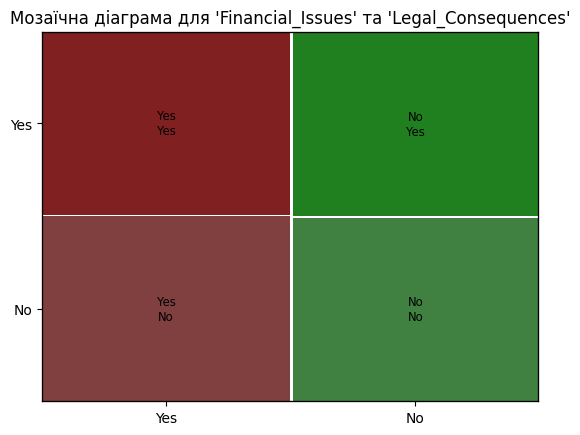

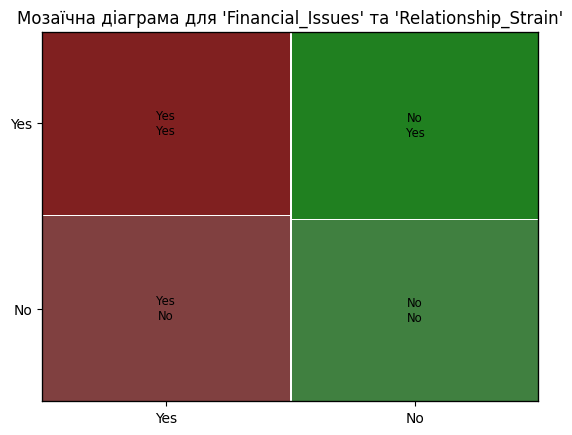

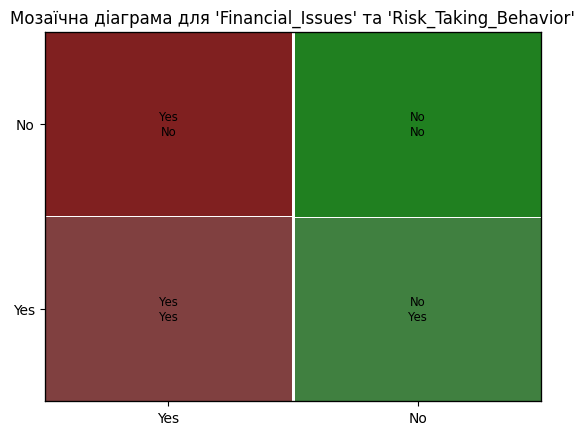

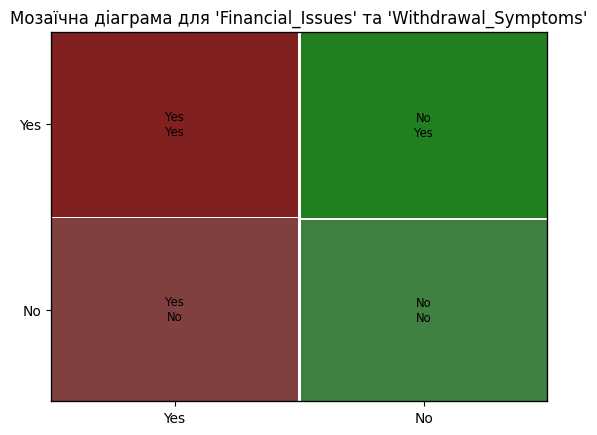

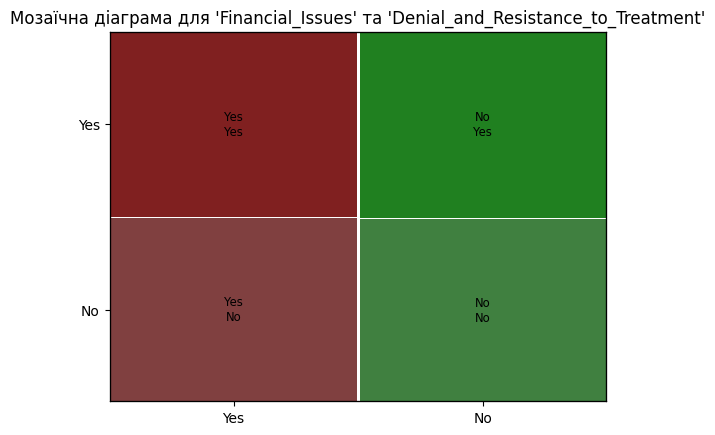

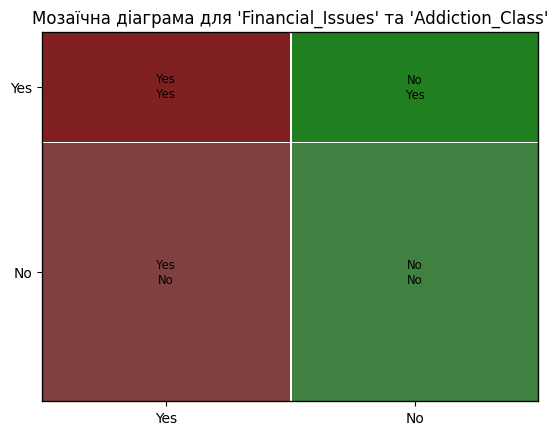

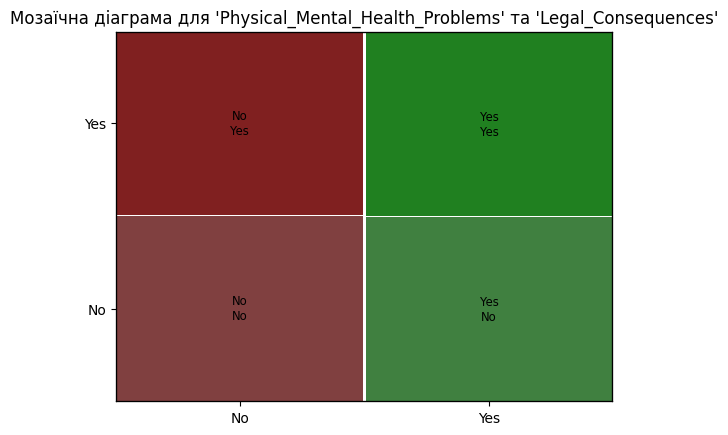

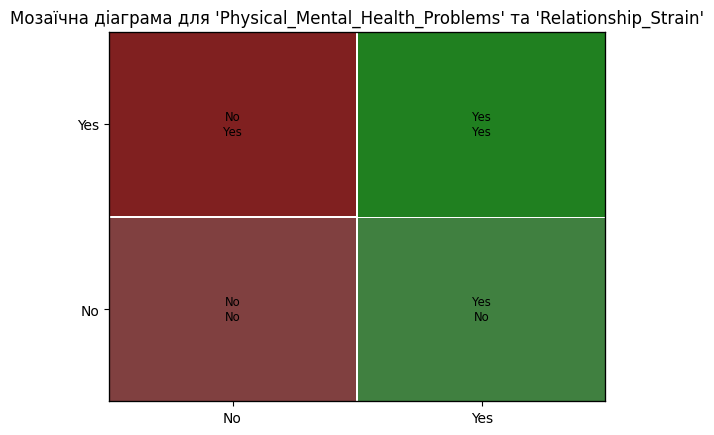

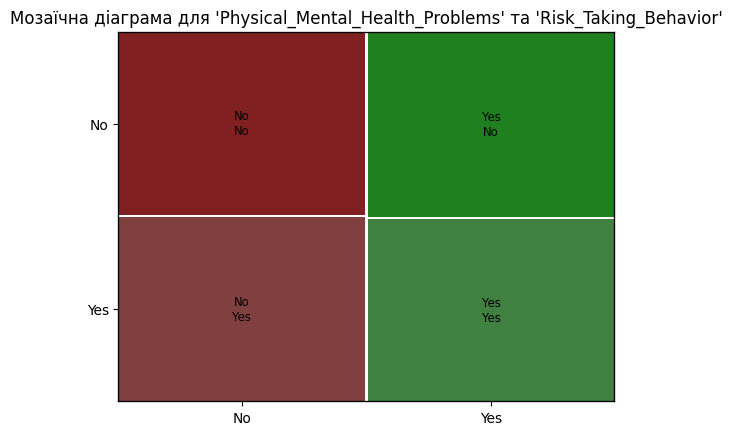

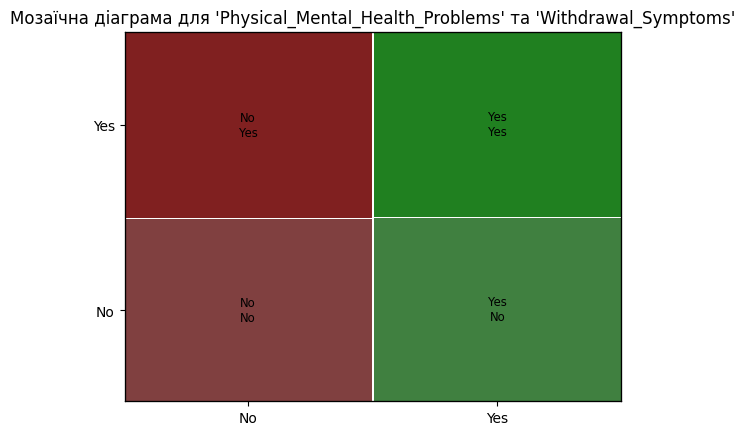

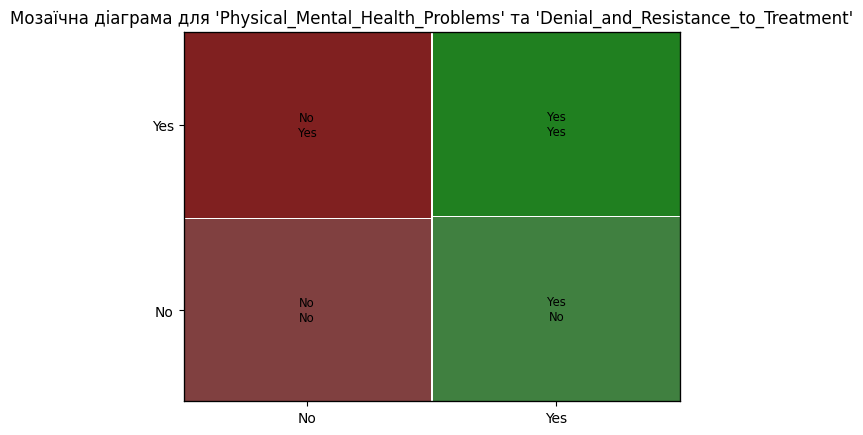

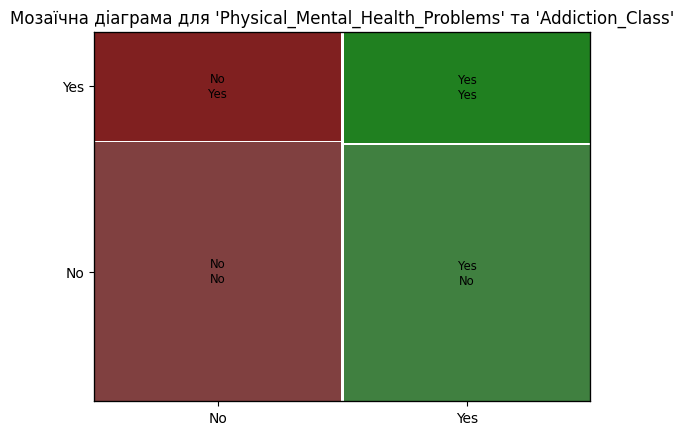

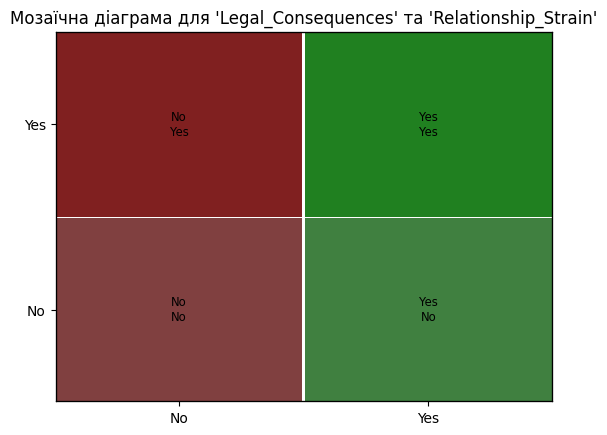

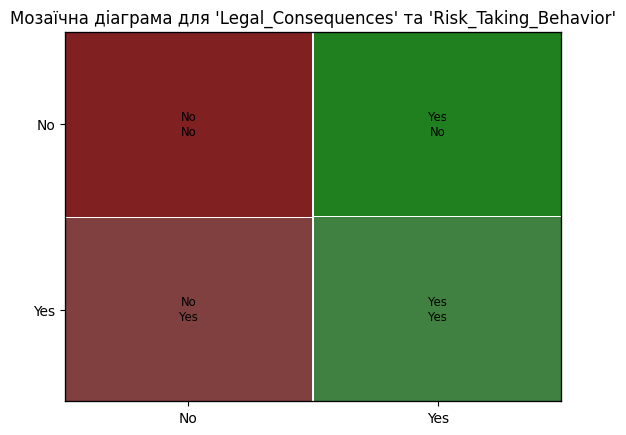

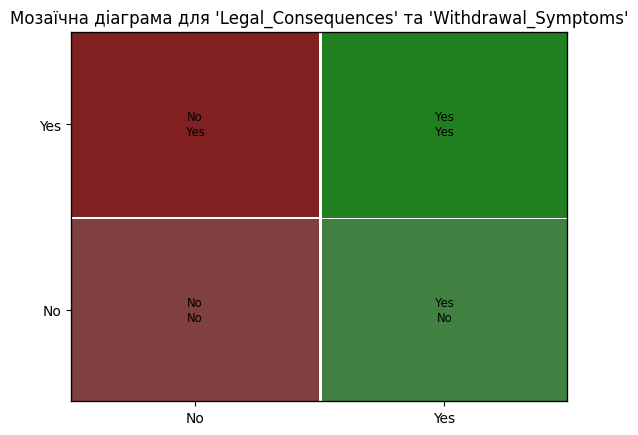

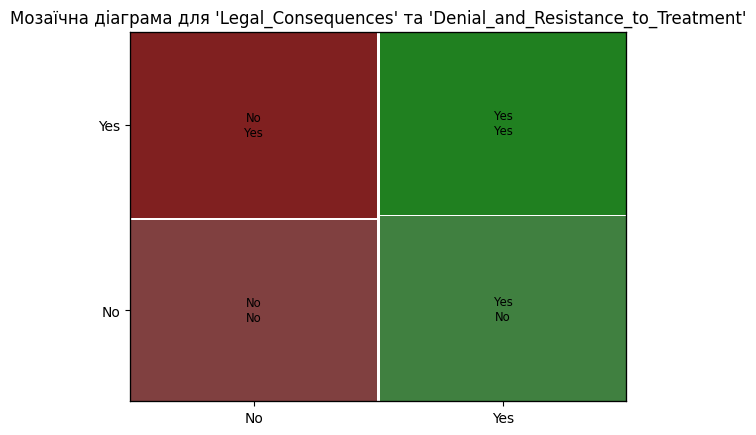

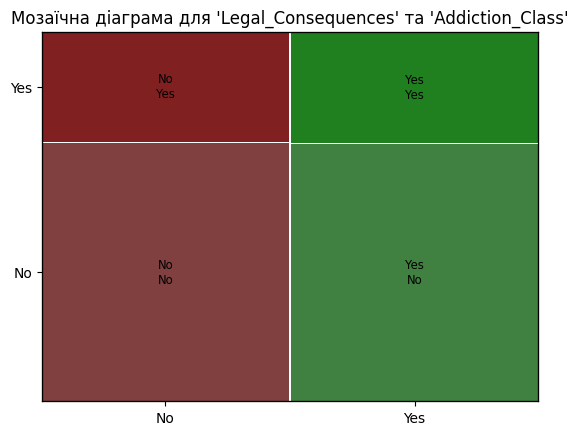

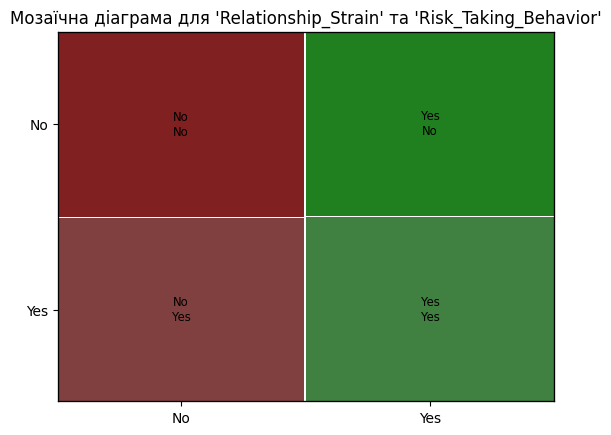

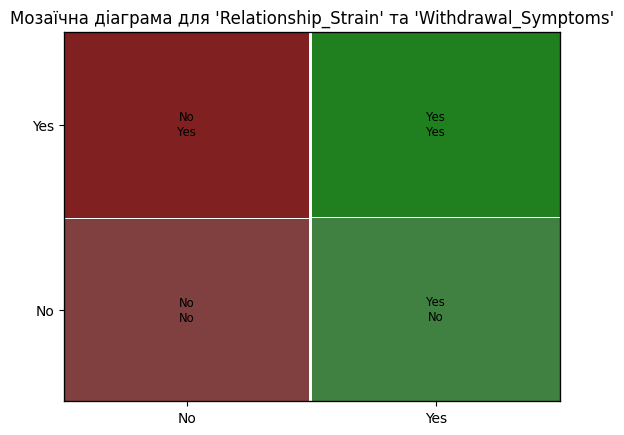

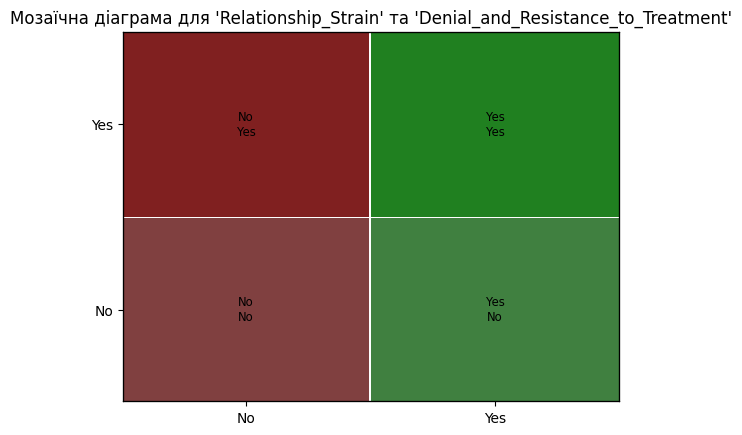

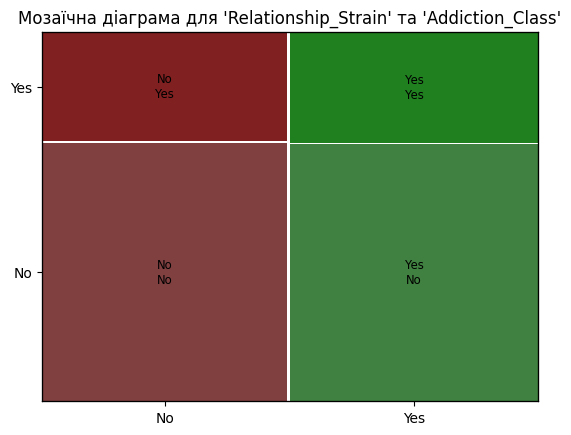

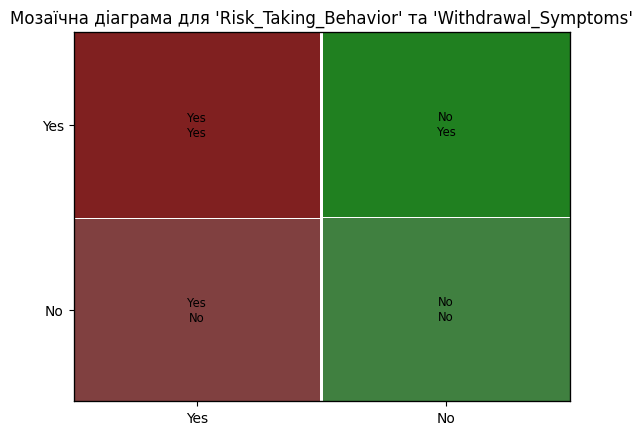

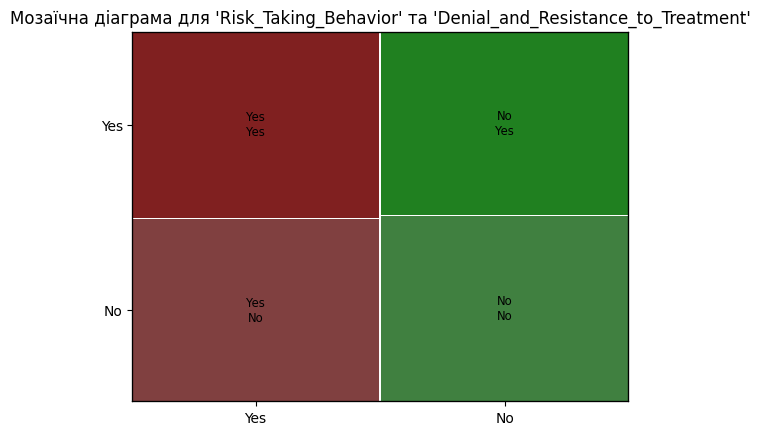

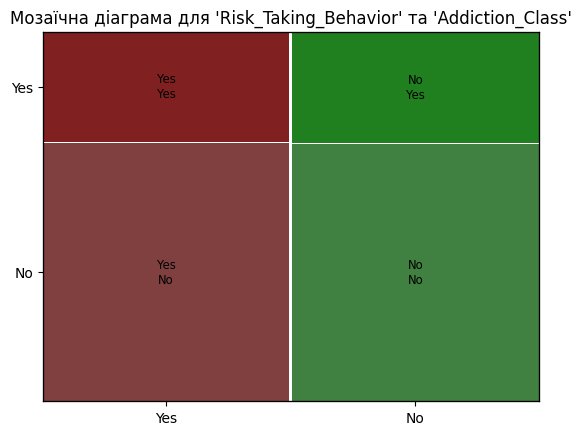

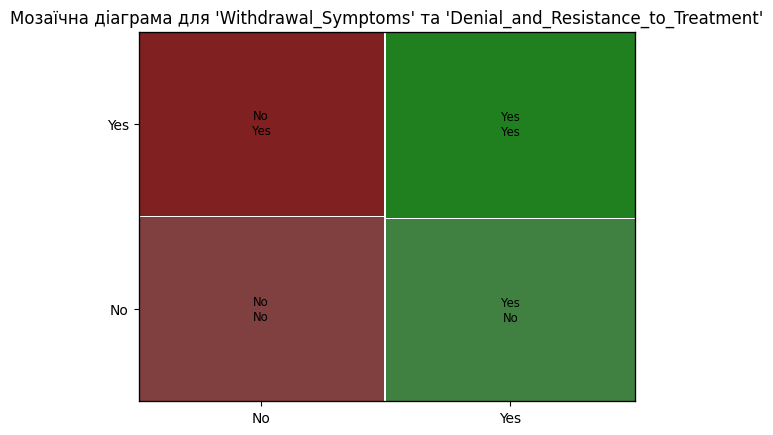

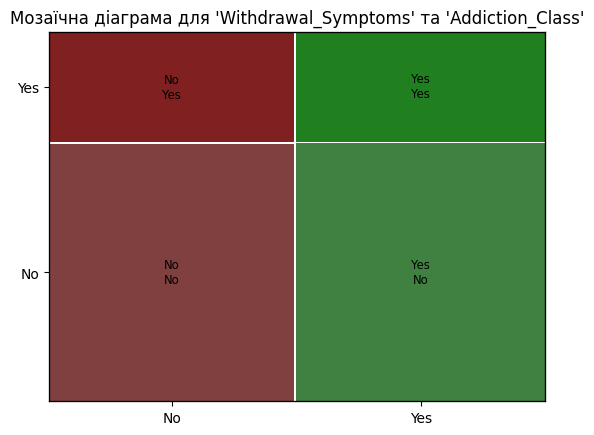

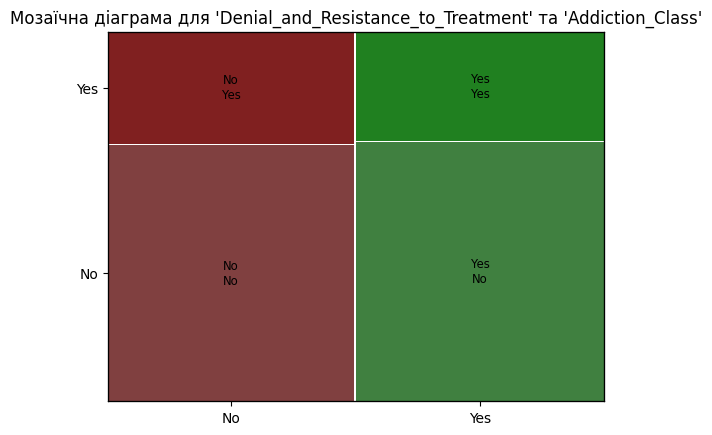

In [ ]:
for i in range(len(df.columns)):
    for j in range(i+1, len(df.columns)):
        col1 = df.columns[i]
        col2 = df.columns[j]
        mosaic.mosaic(df, [col1, col2], title=f"Мозаїчна діаграма для '{col1}' та '{col2}'")
        plt.show()
        print("\n")

# **Аналіз результатів:**

*   Розподіл значень: Ми бачимо, що більшість ознак мають досить рівномірний розподіл значень "Yes" та "No", що є позитивним моментом для подальшого моделювання. Проте, ознака Addiction_Class має певний дисбаланс (значно більше значень "No").

*   Тест хі-квадрат: Більшість p-значень виявилися більше 0.05, що вказує на відсутність статистично значущого зв'язку між більшістю пар ознак. Однак, деякі пари мають p-значення менше 0.05, що може свідчити про певний зв'язок:
  *   Social_Isolation та Risk_Taking_Behavior (p=0.0375)
  *   Financial_Issues та Relationship_Strain (p=0.0278)
  *   Denial_and_Resistance_to_Treatment та Addiction_Class (p=0.0544)
*   Мозаїчні діаграми: Ці діаграми підтверджують результати тесту хі-квадрат. Для пар ознак з низькими p-значеннями ми можемо спостерігати деякі відмінності у розподілі значень в залежності від іншої ознаки.

# **Висновки та подальші кроки:**


1.   Відсутність сильних зв'язків:  Результати EDA не виявили сильних зв'язків між більшістю ознак. Це може ускладнити побудову точних моделей машинного навчання.

2.   Потенційно важливі ознаки: Ознаки, які показали певний зв'язок (Social_Isolation, Risk_Taking_Behavior, Financial_Issues, Relationship_Strain, Denial_and_Resistance_to_Treatment). Вони можуть бути важливими для прогнозування Addiction_Class.

3.   Дисбаланс класів: Дисбаланс в ознаці Addiction_Class потребуватиме спеціальних підходів при побудові моделей (наприклад, зважування класів або зміна вибірки).

4.   Пропущені значення: Наявні пропущені значення необхідно обробити перед побудовою моделей (наприклад, видалити або замінити середніми/медіанами).